In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [62]:
data= pd.read_csv("C:/Users/Bharti/Desktop/excelR/assignments/Linear regression/delivery_time.csv")
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [63]:
np.shape(data)

(21, 2)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [69]:
data.dtypes

Delivery_Time    float64
Sorting_Time     float64
dtype: object

In [65]:
data['Sorting_Time']=pd.to_numeric(data['Sorting_Time'],errors='coerce')

In [67]:
float_Sorting_Time =float(int_Sorting_Time)

NameError: name 'int_Sorting_Time' is not defined

In [56]:
import matplotlib.pyplot as plt

In [68]:

data['Sorting_Time']=data['Sorting_Time'].astype('float')

    Delivery_Time  Sorting_Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

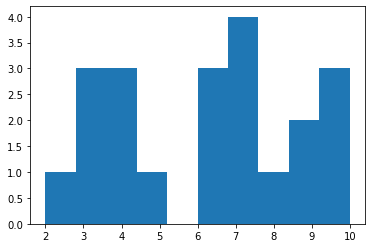

In [71]:
plt.hist(data.Sorting_Time)

<AxesSubplot:>

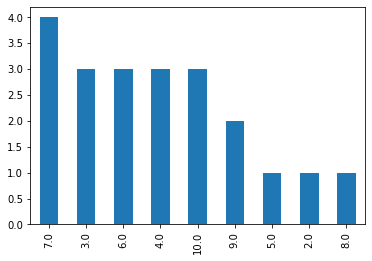

In [74]:
data['Sorting_Time'].value_counts().plot.bar()

In [72]:

data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


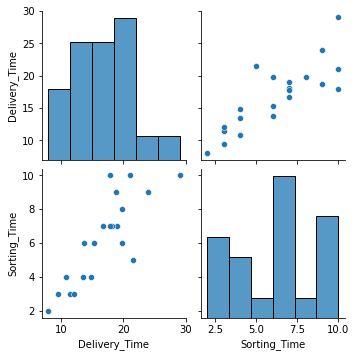

In [76]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

In [77]:
data.corr()


,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [78]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [79]:
data.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [84]:
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,:])



In [85]:
#transformed data
set_printoptions(precision=2)
print(rescaledX[:,:])


[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]
 [0.35 0.5 ]
 [0.52 0.62]
 [0.07 0.12]
 [0.47 1.  ]
 [0.51 0.88]
 [0.56 0.75]
 [0.13 0.25]
 [0.41 0.62]
 [0.17 0.12]
 [0.19 0.12]
 [0.33 0.25]
 [0.27 0.5 ]
 [0.48 0.62]
 [0.   0.  ]
 [0.47 0.62]
 [0.64 0.38]]


In [87]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time ~ Sorting_Time",data = data).fit()

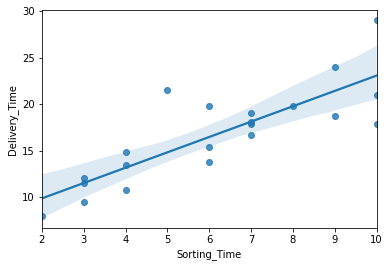

In [88]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=data);

In [89]:
#coeff
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [90]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [91]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [92]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([10,9])

In [93]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [94]:
model.predict(data_pred)

0    23.072933
1    21.423913
dtype: float64